In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1: Loading Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

#2: Reading and Exploring Data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Project/My Classification/weather_classification_data.csv')

In [4]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [6]:
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [7]:
data.shape

(13200, 11)

In [8]:
data.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [9]:
data.nunique()

,0
Temperature,126
Humidity,90
Wind Speed,97
Precipitation (%),110
Cloud Cover,4
Atmospheric Pressure,5456
UV Index,15
Season,4
Visibility (km),41
Location,3


#3: Data Cleaning

###Checking Null Values

In [10]:
data.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


###Checking Duplicates

In [11]:
data.duplicated().sum()

np.int64(0)

#4: Outlier Detection and Removal

In [12]:
numerical_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_removed_data = data[~((data[numerical_cols] < (Q1 - 1.5 * IQR)) | (data[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [13]:
outlier_removed_data.shape

(11689, 11)

### Box plot before removing outliers

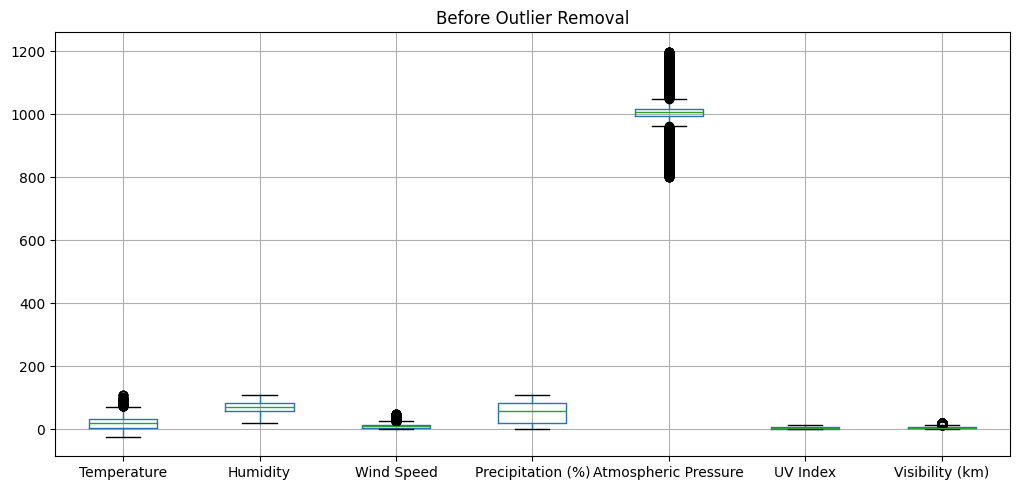

In [14]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
data.boxplot()
plt.title("Before Outlier Removal")

plt.tight_layout()
plt.show()

### Box plot after removing outliers

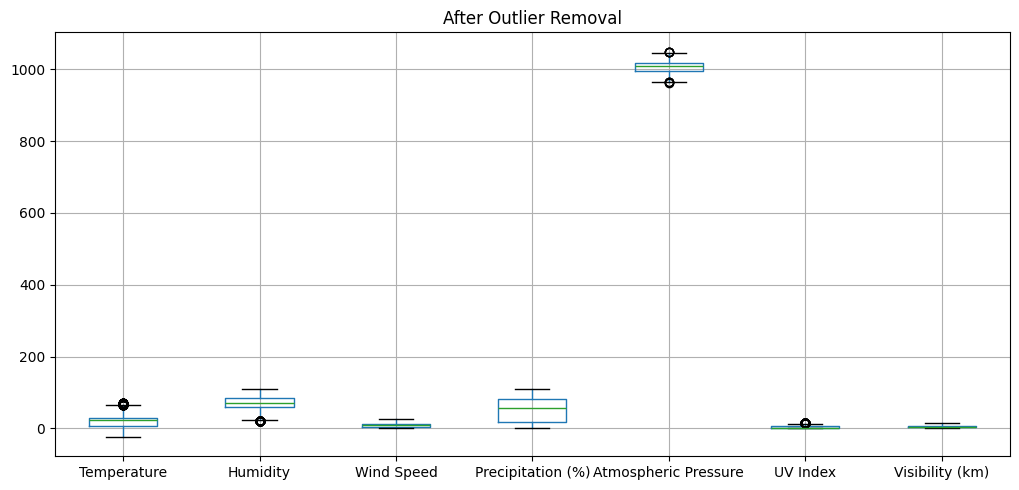

In [15]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 2)
outlier_removed_data.boxplot()
plt.title("After Outlier Removal")

plt.tight_layout()
plt.show()

##5: One Hot Encoding

In [16]:
categorical_cols = ['Cloud Cover', 'Season', 'Location']

encoded_data = pd.get_dummies(outlier_removed_data, columns=categorical_cols)

encoded_data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type,Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain
0,14.0,73,9.5,82.0,1010.82,2,3.5,Rainy,False,False,False,True,False,False,False,True,False,True,False
1,39.0,96,8.5,71.0,1011.43,7,10.0,Cloudy,False,False,False,True,False,True,False,False,False,True,False
2,30.0,64,7.0,16.0,1018.72,5,5.5,Sunny,True,False,False,False,False,True,False,False,False,False,True
3,38.0,83,1.5,82.0,1026.25,7,1.0,Sunny,True,False,False,False,False,True,False,False,True,False,False
4,27.0,74,17.0,66.0,990.67,1,2.5,Rainy,False,False,True,False,False,False,False,True,False,False,True


#6: Data Transformation

###Standardization

In [17]:
x = encoded_data.drop('Weather Type', axis=1)
y = encoded_data['Weather Type']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

feature_names = x.columns
x_scaled = pd.DataFrame(x_scaled, columns=feature_names, index=x.index)

x_scaled.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain
0,-0.319956,0.180018,0.050410,0.935683,0.352182,-0.448083,-0.616594,-0.465801,-0.070002,-0.938817,1.367691,-0.475429,-0.486621,-0.478807,1.133487,-0.599585,1.310626,-0.762433
1,1.250401,1.364687,-0.127689,0.592525,0.399333,0.940475,1.878101,-0.465801,-0.070002,-0.938817,1.367691,-0.475429,2.054986,-0.478807,-0.882233,-0.599585,1.310626,-0.762433
2,0.685072,-0.283548,-0.394836,-1.123266,0.962832,0.385052,0.151005,2.146841,-0.070002,-0.938817,-0.731159,-0.475429,2.054986,-0.478807,-0.882233,-0.599585,-0.762994,1.311591
3,1.187586,0.695092,-1.374378,0.935683,1.544883,0.940475,-1.576092,2.146841,-0.070002,-0.938817,-0.731159,-0.475429,2.054986,-0.478807,-0.882233,1.667820,-0.762994,-0.762433
4,0.496630,0.231525,1.386148,0.436544,-1.205363,-0.725794,-1.000393,-0.465801,-0.070002,1.065170,-0.731159,-0.475429,-0.486621,-0.478807,1.133487,-0.599585,-0.762994,1.311591


### Plot the Standardized data

Text(0.5, 1.0, 'Scaled Numerical Features')

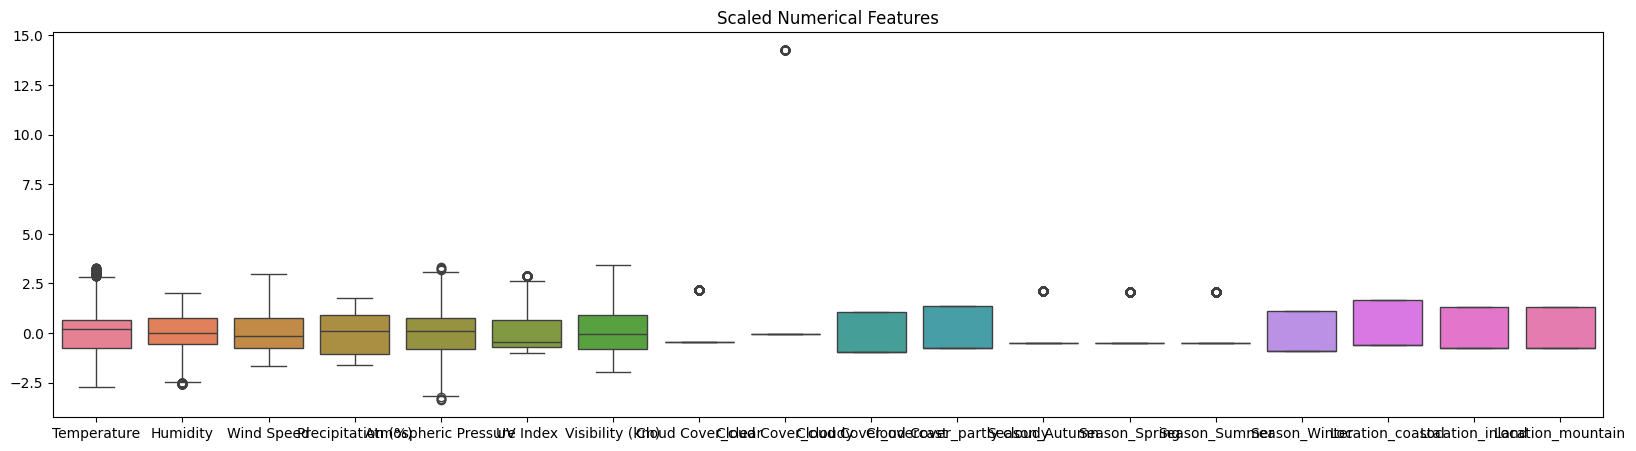

In [18]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=x_scaled)
plt.title('Scaled Numerical Features')

##Plot the Target Value Distribution

Text(0.5, 0, 'Conterfeit')

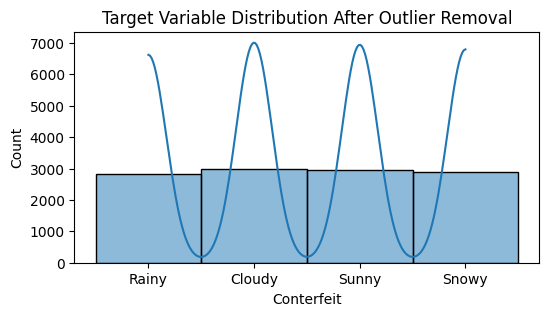

In [19]:
plt.figure(figsize=(6, 3))
sns.histplot(y, bins=30, kde=True)
plt.title('Target Variable Distribution After Outlier Removal')
plt.xlabel('Conterfeit')

#7: Splitting Data

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

#8: Classification

In [21]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

#9: Evaluation Metrics


Classification Report:

              precision    recall  f1-score   support

      Cloudy       0.95      0.97      0.96       615
       Rainy       0.97      0.97      0.97       554
       Snowy       1.00      0.98      0.99       571
       Sunny       0.99      0.98      0.99       598

    accuracy                           0.98      2338
   macro avg       0.98      0.98      0.98      2338
weighted avg       0.98      0.98      0.98      2338



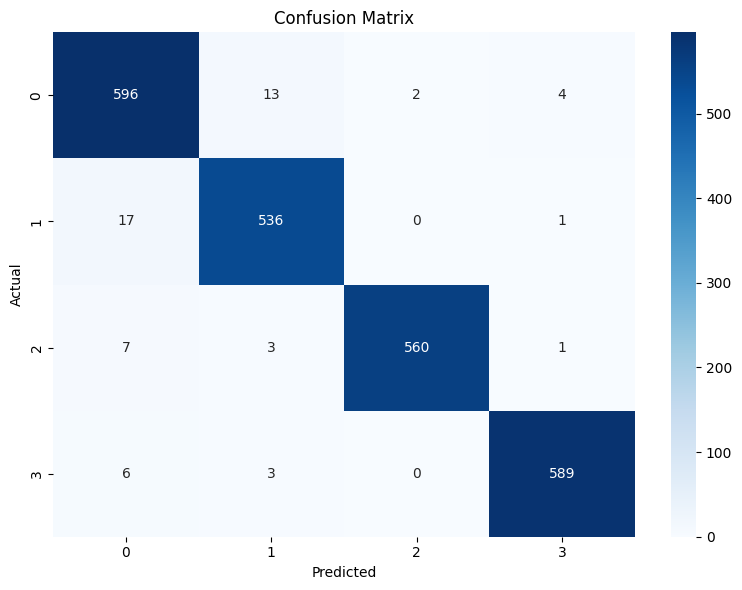

In [22]:
y_pred = model.predict(x_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

#10: Predicting on Unseen Data

In [23]:
new_data = pd.DataFrame([{
    "Temperature": 28.5,
    "Humidity": 65,
    "Wind Speed": 14,
    "Precipitation (%)": 10,
    "Atmospheric Pressure": 1012,
    "UV Index": 5,
    "Visibility (km)": 8,
    "Cloud Cover": "Partly Cloudy",
    "Season": "Summer",
    "Location": "Lahore"
}])

new_data_encoded = pd.get_dummies(new_data)

for col in feature_names:
    if col not in new_data_encoded.columns:
        new_data_encoded[col] = 0

new_data_encoded = new_data_encoded[feature_names]

new_data_scaled = scaler.transform(new_data_encoded)

predicted_weather = model.predict(new_data_scaled)

print("\nPredicted Weather Type:", predicted_weather[0])


Predicted Weather Type: Sunny


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
